In [ ]:
import pandas as pd
from libs.lib import DataScalerSplitter, GRUTrainerConfig, GRUTrainer, PlotResults

df = pd.read_csv("new_proj_data.csv")

df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index("date", inplace=True)

feature_cols = ['FedFundRate', 'EquityMktVolatility', 'EPU', 
                'EquityMktEPU', 'ExRate', 'LoanRate', 
                'CorBondYield', 'OilPrice', 'NASDAQ']
target = "TreasuryYield"

pre = DataScalerSplitter(features=feature_cols, target=target, scale_target=True)
tr_X, tr_y, vl_X, vl_y, te_X, te_y = pre.split_and_scale(df)

window = 60

cfg = GRUTrainerConfig(
        window      = window,
        hidden_dim  = 32,
        num_layers  = 1,
        dropout     = 0.2,
        max_epochs  = 250,
        patience    = 100,
    )

trainer = GRUTrainer(cfg)
trainer.fit(tr_X, tr_y, vl_X, vl_y, verbose=True)

Epoch 001 | Train 0.324008 | Val 0.076883
Epoch 010 | Train 0.076109 | Val 0.420097
Epoch 020 | Train 0.060142 | Val 0.161924
Epoch 030 | Train 0.042048 | Val 0.108113
Epoch 040 | Train 0.043628 | Val 0.082925
Epoch 050 | Train 0.033769 | Val 0.146776
Epoch 060 | Train 0.034049 | Val 0.085520
Epoch 070 | Train 0.030720 | Val 0.148714
Epoch 080 | Train 0.030024 | Val 0.344034
Epoch 090 | Train 0.027064 | Val 0.224024
Epoch 100 | Train 0.031395 | Val 0.283564
Epoch 110 | Train 0.024868 | Val 0.300693
Epoch 120 | Train 0.031664 | Val 0.149954
Epoch 130 | Train 0.034709 | Val 0.292806
Epoch 140 | Train 0.028767 | Val 0.363019
Early stopping at epoch 145. Best Val: 0.067866


c:\Users\santo\Desktop\new_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


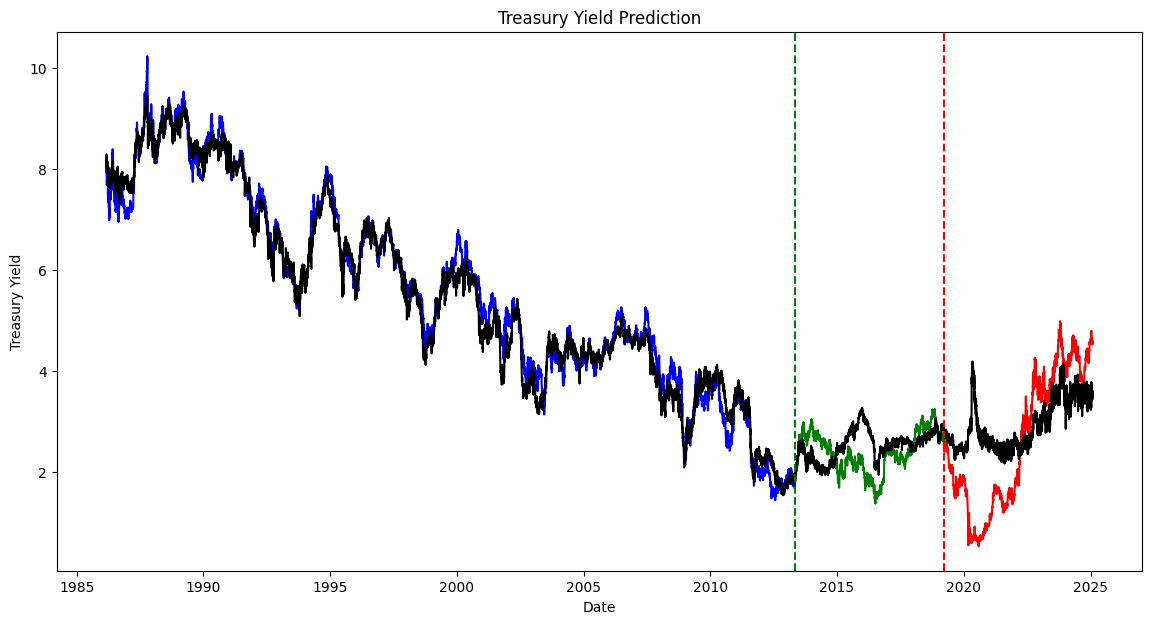

In [ ]:
preds = pre.inverse_y(trainer.predict(
    pre.transform(df[feature_cols], df[target])[0]
))

pred_df = pd.DataFrame({
    "Date" : df.index[window:],
    "Predicted": preds,
    "Actual": df[target].values[window:]
})

plotter = PlotResults(pre.val_index, pre.test_index)
plotter.plot(pred_df)